In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
"""


This code
-Creates a pandas dataframe from a csv file Lichess provides after a tournament.
-Creates a new column called "Difference" by subtracting "Performance" from the "Rating"
    -A positive "Difference" mean player did better than expected.
    _A negative "Difference" mean player did worse than expected.
-Creates pie plots in a single figure for each rating range showing percentage and number of players who did better and worse
    than expected.
-Finally creates a bar graph showing percentage of players who did better than expected in all rating ranges.

"""

'\n\n\nThis code\n-Creates a pandas dataframe from a csv file Lichess provides after a tournament.\n-Creates a new column called "Difference" by subtracting "Performance" from the "Rating"\n    -A positive "Difference" mean player did better than expected.\n    _A negative "Difference" mean player did worse than expected.\n-Creates pie plots in a single figure for each rating range showing percentage and number of players who did better and worse\n    than expected.\n-Finally creates a bar graph showing percentage of players who did better than expected in all rating ranges.\n\n'

In [2]:
#User Panel
sensitivity = 200#Rating span for each rating range. You can change that value for different spans

In [3]:
#Creating the master data frame from a csv file
csv_name = "lichess_tournament_2023.11.09_z4RuEszs_eastern-blitz.csv"
master_data = pd.read_csv(csv_name,
                          usecols=["Rank", "Username", "Rating", "Score", "Performance"])

#Elimination of Players who joined the tournament but did not play a game
na_condition = master_data["Performance"].notna()
master_data = master_data.loc[na_condition]

#Creating a new column "Difference" and Sorting
#If "Difference" > 0, Player did better than expected
#else, player did worse than expected

master_data["Difference"] = master_data["Performance"] - master_data["Rating"]
master_data.sort_values(by="Difference", inplace=True, ascending=False, ignore_index=True)
print(master_data.head(10))

   Rank        Username  Rating  Score  Performance  Difference
0  1061       LuckiLuci     676      0       1706.0      1030.0
1   736     moorthy1962    1843      2       2717.0       874.0
2   571         Janshua    1133      4       1983.0       850.0
3   827    manasa_reddy    1009      2       1788.0       779.0
4   783     Yuanxiaoqiu    1245      2       2017.0       772.0
5   767          romy06    1562      2       2192.0       630.0
6   747         Ayesuka    1780      2       2406.0       626.0
7   743       sallamo99    1822      2       2446.0       624.0
8   737  Anmolsingh2000    1962      2       2567.0       605.0
9   321    economist101    1952      8       2547.0       595.0


In [4]:
#Defining booleans for grouping in each rating range
cond_positive_players = master_data["Difference"] >= 0  # df of players who did better than their ratings (or equal)
cond_negative_players = master_data["Difference"] < 0  # df of players who did worse than their ratings


#Deciding max and minimum values of Rating_Ranges
max_rating = max(master_data["Rating"] + (sensitivity - max(master_data["Rating"]) % sensitivity))
min_rating = min(master_data["Rating"]) - min(master_data["Rating"]) % sensitivity
length = (max_rating - min_rating) / sensitivity
row_count = np.ceil(np.sqrt(length)) #Number of rows and columns in the pie chart figure




In [5]:
#Creating the dictionary which:
    #Keys are strings  that represent the rating range (e.g. Rating 500-750, Rating 750-1000 etc...)
    #Values are dataframes that consist of players in this rating range

master_diction = {}
for x in range(min_rating, max_rating, sensitivity):

    var_name = f"Rating {x}_{x + sensitivity}" #Dummy  variable for key names
    master_diction[var_name] = master_data.loc[(master_data["Rating"] >= x) & (master_data["Rating"] < x + sensitivity)]



#Creating two new dictionaries from the master dictionary depending on the sign of the "Difference"
positive_diction = {}
negative_diction = {}

for x in master_diction:
    positive_diction[x] = master_diction[x].loc[cond_positive_players]
    negative_diction[x] = master_diction[x].loc[cond_negative_players]



#Creating the dictionary which:
    #Keys refer to the rating range. Values contain a tuple such that:
        #tuple[0] shows the number of players with positive  difference in that range
        #tuple[1] shows the number of players with negative  difference in that range
        #tuple[2] shows the row index in the figure
        #tuple[3] shows the column index in the figure
result_diction = {}

k = 0


for x in master_diction:
    result_diction[x] = (len(positive_diction[x]), len(negative_diction[x]), int(k // row_count), int(k % row_count))
    k += 1


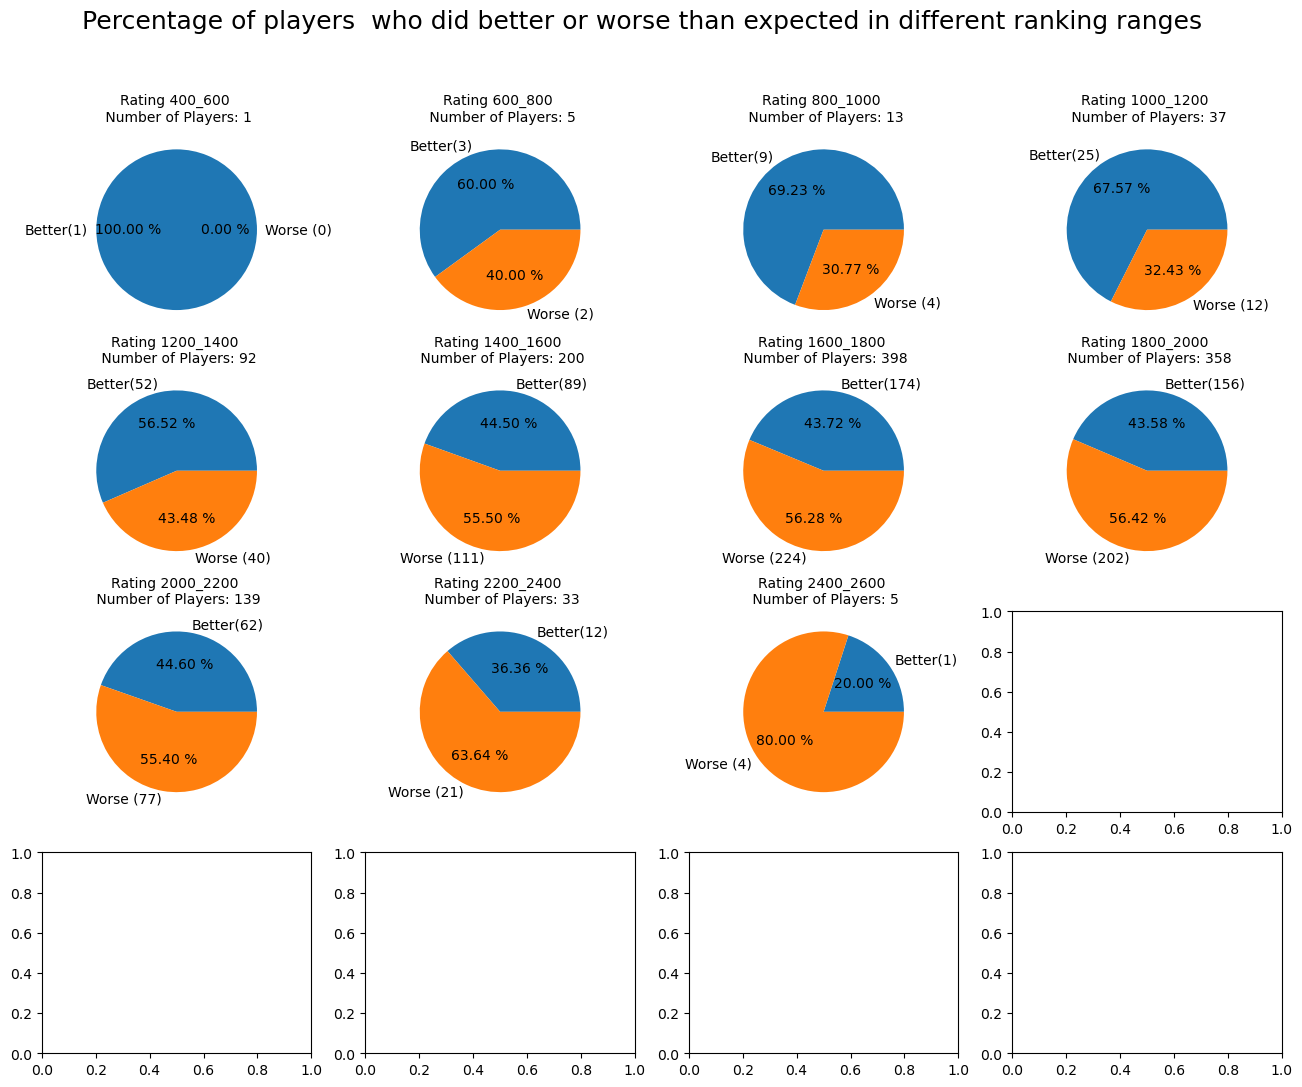

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [6]:
row_count = int(np.ceil(np.sqrt(len(result_diction))))
fig, ax = plt.subplots(row_count, row_count, figsize=(16, 12))


for x in result_diction:

    if (result_diction[x][0]) == 0 and (result_diction[x][1]) == 0:
        continue #Do nothing if  there is no player in that range

    else:

        plt.figure(figsize=(12, 6))
        ax[result_diction[x][2], result_diction[x][3]].pie(result_diction[x][0:2], labels = [f"Better({(result_diction[x][0])})",
                  f"Worse ({(result_diction[x][1])})"], autopct="%.2f %%")


        ax[result_diction[x][2], result_diction[x][3]].set_title(f"{x} \n Number of Players: {sum(result_diction[x][0:2])}", fontsize=10)

fig.suptitle("Percentage of players  who did better or worse than expected in different ranking ranges", fontsize=18)
plt.subplots_adjust(hspace=0.5, wspace=0.3, left=0.1, right=0.9)
#plt.savefig(f"Pie_charts_as_subplots with rating span {sensitivity}", dpi=300)



Text(0.5, 1.0, 'Percentage of Players who did better than expected')

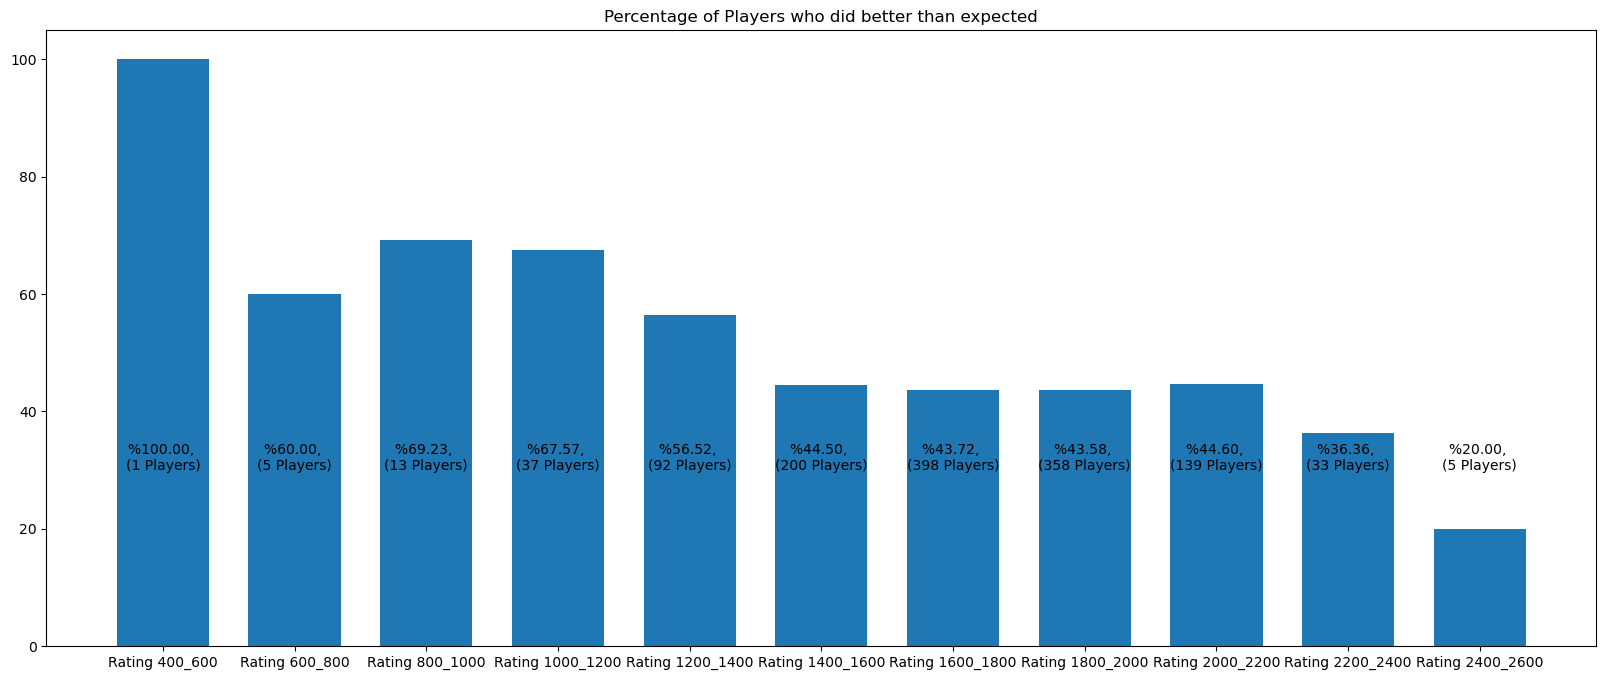

In [7]:
values = []
for x in result_diction.values():
    if (int(x[0]) + int(x[1])) == 0:
        values.append(0) #If there  is  no player in the range, let positivity rate be 0
    else:
        values.append((int(x[0]) / (int(x[0]) + int(x[1]))) * 100)


labels = [x for x in result_diction]
plt.figure(figsize = (20, 8))
plt.bar(labels, values, width=0.7)

#Positioning the labels on bars, making use of enumeration
for num, element in enumerate(values):
    plt.text(num, 30, f"%{values[num]:.2f}, \n({sum(result_diction[labels[num]][0:2])} Players)", horizontalalignment='center')


plt.title("Percentage of Players who did better than expected")

